<a href="https://colab.research.google.com/github/nneguss1/DATA-690-WANG/blob/master/Class_Project/Individual_Prj_Del2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*I have downloaded gage water quality measurements for four gages in the vicinity of Prince George's County. The data is downloaded in a tab elimited text file which is read into python and cleaned up to make a dataframe of measurements. The measurements cover the time span from January 2010 to present for all the gages studied.*

In [1]:
#This cell imports the required libraries some commonly used list items for data processing.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

column_lst = ["agency_cd","site_no","datetime","Turbidity_FNU1","PH","Dissolved_Oxy_DO","Turbidity_FNU2"]

In [2]:
#This is the initial attempt to import the data as text and read. Since it has a lot of lines, I decided to convert to CSV and read that in instead

In [3]:
with open("/content/drive/My Drive/Colab Notebooks/AnacostiaRiver.txt","rt") as f:
    line_list = f.readlines()[34:]
    #First_20lines = line_list.readlines()[0:20]

len(line_list)
DF_01649500 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/AnacostiaRiver_01649500.csv", sep =",", usecols= column_lst, skiprows = 33)
DF_01649500['Turbidity_FNU1'].update(DF_01649500.pop('Turbidity_FNU2'))
DF_01649500['Turbidity_FNU1'].dtypes
DF_01649500.replace(to_replace='Eqp', value= 0, inplace=True, limit=None, regex=False, method='pad')
DF_01649500['Turbidity_FNU'] = pd.to_numeric(DF_01649500['Turbidity_FNU1'])
DF_01649500['Turbidity_FNU'].describe()
#DF_01649500.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


count    880251.000000
mean         19.247704
std          46.255655
min           0.000000
25%           4.100000
50%           7.200000
75%          15.000000
max        1920.000000
Name: Turbidity_FNU, dtype: float64

In [6]:
# This is to run a descriptive summary for the whole dataframe. As can be seen, the catagorical data 
#(like Agency ID  and Datetime show 'NaN' for mean and such computation)
DF_01649500.describe(include='all') 

,agency_cd,site_no,datetime,Turbidity_FNU1,PH,Dissolved_Oxy_DO,Turbidity_FNU
count,967477,967477.0,967477,880251.0,946925.000000,956314.000000,880251.000000
unique,1,NaN,967373,3018.0,NaN,NaN,NaN
top,USGS,NaN,11/4/12 1:50,12.0,NaN,NaN,NaN
freq,967477,NaN,2,16116.0,NaN,NaN,NaN
mean,NaN,1649500.0,NaN,NaN,7.540367,10.128512,19.247704
std,NaN,0.0,NaN,NaN,0.407637,2.337083,46.255655
min,NaN,1649500.0,NaN,NaN,5.200000,0.200000,0.000000
25%,NaN,1649500.0,NaN,NaN,7.300000,8.300000,4.100000
50%,NaN,1649500.0,NaN,NaN,7.400000,10.000000,7.200000
75%,NaN,1649500.0,NaN,NaN,7.600000,12.000000,15.000000


In [ ]:
DF_01649500.tail()

,agency_cd,site_no,datetime,Turbidity_FNU1,PH,Dissolved_Oxy_DO,Turbidity_FNU
967472,USGS,1649500,10/22/20 15:15,2.4,8.2,11.6,2.4
967473,USGS,1649500,10/22/20 15:20,2.3,8.3,11.8,2.3
967474,USGS,1649500,10/22/20 15:25,2.5,8.3,11.8,2.5
967475,USGS,1649500,10/22/20 15:30,2.4,8.2,11.6,2.4
967476,USGS,1649500,10/22/20 15:35,2.4,8.3,11.7,2.4


In [ ]:
len(line_list)    # this isto inspect how many lines are found in the text file. The file contains 10 years of data for 3 parameters collected every 5 min. 
print(line_list[:100])

['5s\t15s\t20d\t6s\t14n\t10s\t14n\t10s\t14n\t10s\t14n\t10s\t14n\t10s\t14n\t10s\n', 'USGS\t01649500\t2010-01-01 00:00\tEST\t\t\t3.2\tA\t7.3\tA\t1900\tA\t13.3\tA\t32.0\tA\n', 'USGS\t01649500\t2010-01-01 00:15\tEST\t\t\t3.2\tA\t7.3\tA\t1920\tA\t13.3\tA\t34.0\tA\n', 'USGS\t01649500\t2010-01-01 00:30\tEST\t\t\t3.2\tA\t7.3\tA\t1950\tA\t13.3\tA\t35.0\tA\n', 'USGS\t01649500\t2010-01-01 00:45\tEST\t\t\t3.2\tA\t7.3\tA\t1970\tA\t13.3\tA\t35.0\tA\n', 'USGS\t01649500\t2010-01-01 01:00\tEST\t\t\t3.1\tA\t7.3\tA\t1960\tA\t13.4\tA\t36.0\tA\n', 'USGS\t01649500\t2010-01-01 01:15\tEST\t\t\t3.1\tA\t7.3\tA\t1960\tA\t13.4\tA\t35.0\tA\n', 'USGS\t01649500\t2010-01-01 01:30\tEST\t\t\t3.1\tA\t7.3\tA\t1960\tA\t13.4\tA\t36.0\tA\n', 'USGS\t01649500\t2010-01-01 01:45\tEST\t\t\t3.1\tA\t7.3\tA\t1940\tA\t13.4\tA\t36.0\tA\n', 'USGS\t01649500\t2010-01-01 02:00\tEST\t\t\t3.1\tA\t7.3\tA\t1960\tA\t13.4\tA\t35.0\tA\n', 'USGS\t01649500\t2010-01-01 02:15\tEST\t\t\t3.1\tA\t7.3\tA\t1960\tA\t13.4\tA\t36.0\tA\n', 'USGS\t01649500\t

**Since the downloaded data was too large, I have to rechange the datatype into a CSV and use Pandas to import it instead.**

In [5]:
DF_01649190 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Paint_Branch_01649190.csv", sep =",", usecols= column_lst,skiprows = 34)
# The original data has two columns for "Turbidity". It looks like somewhere in the middle of the collection timeframe,
# the turbidity sensor was changed and therefore we have to update the data from one column into the other one. 
DF_01649190['Turbidity_FNU1'].update(DF_01649190.pop('Turbidity_FNU2')) 
DF_01649190.head()
# The PH column contained some strings that will not be processed as a float in python. Therefore the column was assigned "object" data type.
# This made it difficult to perform any type of operations and therefore we have to update the "PH" column to replace the unknown string with VALUE. 
DF_01649190.replace(to_replace='Eqp', value= 7, inplace=True, limit=None, regex=False, method='pad')

DF_01649190['PH'].dtypes
DF_01649190['PH'].astype('float')
DF_01649190['PH1'] = pd.to_numeric(DF_01649190['PH'])
DF_01649190.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,agency_cd,site_no,datetime,Turbidity_FNU1,PH,Dissolved_Oxy_DO,PH1
0,USGS,1649190,1/1/10 0:00,27.0,7.4,13.6,7.4
1,USGS,1649190,1/1/10 0:15,25.0,7.3,13.6,7.3
2,USGS,1649190,1/1/10 0:30,23.0,7.3,13.6,7.3
3,USGS,1649190,1/1/10 0:45,22.0,7.3,13.6,7.3
4,USGS,1649190,1/1/10 1:00,22.0,7.3,13.6,7.3


In [7]:
DF_01649190.describe(include='all')

,agency_cd,site_no,datetime,Turbidity_FNU1,PH,Dissolved_Oxy_DO,PH1
count,951202,951202.0,951202,827589.000000,928347.0,945127.000000,928347.000000
unique,1,NaN,951098,NaN,58.0,NaN,NaN
top,USGS,NaN,11/6/16 1:50,NaN,7.4,NaN,NaN
freq,951202,NaN,2,NaN,269153.0,NaN,NaN
mean,NaN,1649190.0,NaN,8.535605,NaN,10.389379,7.444691
std,NaN,0.0,NaN,38.553221,NaN,2.064410,0.179042
min,NaN,1649190.0,NaN,0.000000,NaN,6.400000,5.900000
25%,NaN,1649190.0,NaN,0.800000,NaN,8.600000,7.300000
50%,NaN,1649190.0,NaN,1.700000,NaN,10.000000,7.400000
75%,NaN,1649190.0,NaN,4.300000,NaN,12.000000,7.500000


In [ ]:
DF_01649190['Dissolved_Oxy_DO'].describe()

count    945127.000000
mean         10.389379
std           2.064410
min           6.400000
25%           8.600000
50%          10.000000
75%          12.000000
max          15.800000
Name: Dissolved_Oxy_DO, dtype: float64

*The "datetime" column contains information in the format D/M/Y HH:MM. I wanted to be able to group the data by the DATE and compute the mean daily measurements. For that i will have to define the format for the column so that I can extract the date as a new column on to the data. The original dataframes will have a column for "DATE"added and that will be used to group the data by.*

In [8]:
from datetime import datetime, timedelta
#dateTime_object = datetime.strptime(DF_01649190._get_value(0,'datetime'), "%m/%d/%y %H:%M")
#DF_01649190[1]['datetime']
#print(dateTime_object.year)
DF_01649190['datetime'] = pd.to_datetime(DF_01649190['datetime'], format='%m/%d/%y %H:%M')
DF_01649500['datetime'] = pd.to_datetime(DF_01649500['datetime'], format='%m/%d/%y %H:%M')
DF_01649190['DATE'] = DF_01649190['datetime'].dt.date
DF_01649500['DATE'] = DF_01649500['datetime'].dt.date
df_agg_01649190 = (DF_01649190.groupby(['DATE'])['Turbidity_FNU1','PH1', 'Dissolved_Oxy_DO'].mean().reset_index())
df_agg_01649500 = (DF_01649500.groupby(['DATE'])['Turbidity_FNU','PH','Dissolved_Oxy_DO'].mean().reset_index())
#df_agg_01649190_PH = (DF_01649190.groupby(['DATE'])['PH'].mean().reset_index())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
df_agg_01649500.head(5)

,DATE,Turbidity_FNU,PH,Dissolved_Oxy_DO
0,2010-01-01,22.645833,7.300000,13.342708
1,2010-01-02,13.958333,7.301042,13.980208
2,2010-01-03,12.976042,7.300000,14.611458
3,2010-01-04,14.156250,7.303125,14.562500
4,2010-01-05,21.659375,7.366667,14.506250


In [ ]:
df_agg_01649190.head(5)

,DATE,Turbidity_FNU1,PH1,Dissolved_Oxy_DO
0,2010-01-01,11.443750,7.336458,13.428125
1,2010-01-02,10.402083,7.377083,14.203125
2,2010-01-03,6.684375,7.305208,14.917708
3,2010-01-04,6.578125,7.300000,14.885417
4,2010-01-05,5.755208,7.331250,14.830208


In [9]:
DF_01649190.tail()

,agency_cd,site_no,datetime,Turbidity_FNU1,PH,Dissolved_Oxy_DO,PH1,DATE
951197,USGS,1649190,2020-10-22 13:45:00,0.2,7.7,9.8,7.7,2020-10-22
951198,USGS,1649190,2020-10-22 13:50:00,0.2,7.7,9.8,7.7,2020-10-22
951199,USGS,1649190,2020-10-22 13:55:00,0.2,7.7,9.8,7.7,2020-10-22
951200,USGS,1649190,2020-10-22 14:00:00,0.2,7.7,9.7,7.7,2020-10-22
951201,USGS,1649190,2020-10-22 14:05:00,0.2,7.7,9.7,7.7,2020-10-22


In [10]:
df_agg_01649190.tail()

,DATE,Turbidity_FNU1,PH1,Dissolved_Oxy_DO
3872,2020-10-18,NaN,7.658681,10.615278
3873,2020-10-19,0.220139,7.640392,10.266275
3874,2020-10-20,0.520629,7.638194,9.927778
3875,2020-10-21,0.412153,7.623611,9.613194
3876,2020-10-22,0.247647,7.614706,9.513529


*Since I am grouping the data collected every 5 min to a daily average, I wanted to change the axis lable on the plot to just show the year. Therefore I decided to use mdates library from the mathplotlib to format the axis.*

In [12]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator(interval=3)  # every three month
years_fmt = mdates.DateFormatter('%Y') #every year

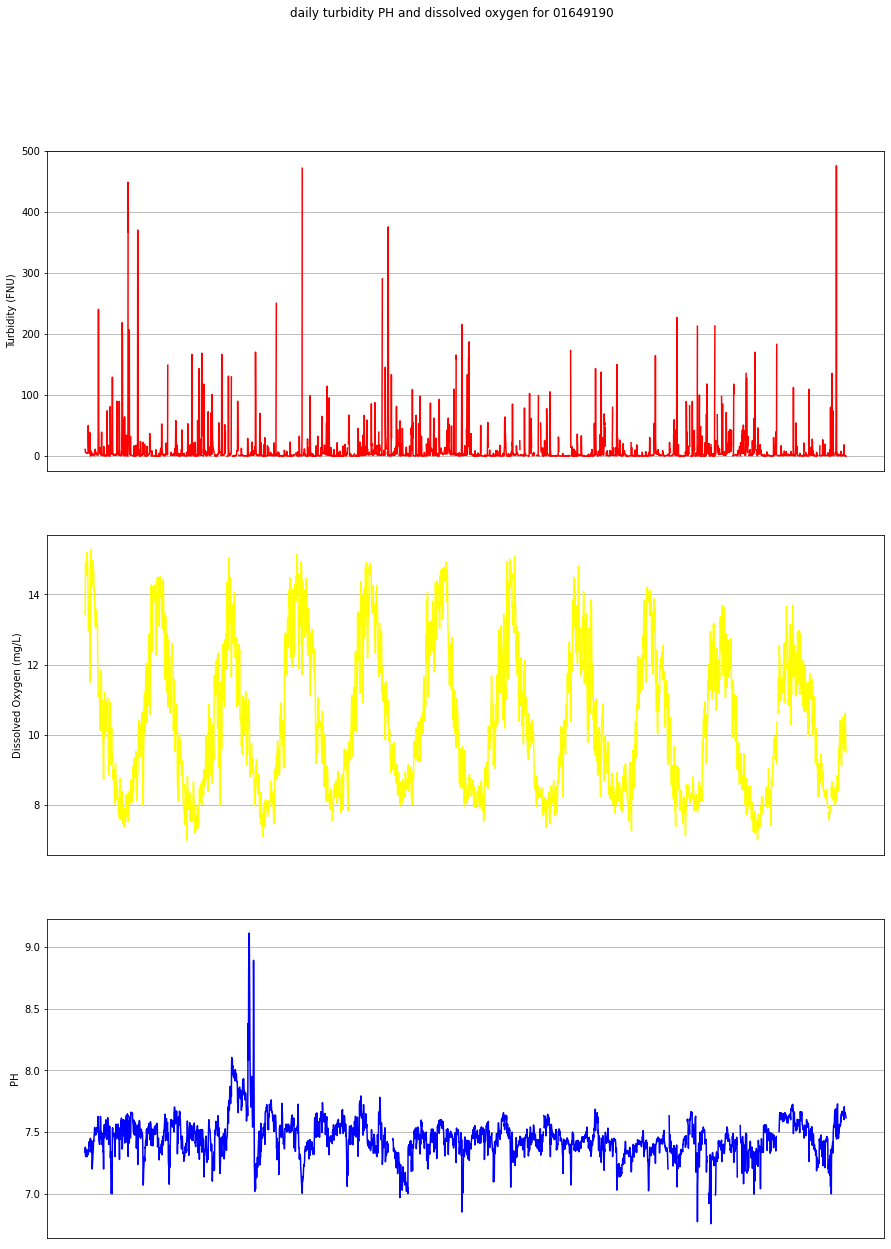

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(15, 20))
fig.suptitle('daily turbidity PH and dissolved oxygen for 01649190')
df_agg_01649190['Turbidity_FNU1'].plot(ax = ax1, x='DATE', y='Turbidity_FNU1', color = 'red')
ax1.set(ylabel ="Turbidity (FNU)")
df_agg_01649190['Dissolved_Oxy_DO'].plot(ax=ax2, x='DATE', y='Dissolved_Oxy_DO', color ='yellow')
ax2.set(ylabel ="Dissolved Oxygen (mg/L)")
df_agg_01649190['PH1'].plot(ax=ax3, x='DATE', y='PH1', color = 'blue')
ax3.set(ylabel ="PH")

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax2.xaxis.set_major_locator(years)
ax2.xaxis.set_major_formatter(years_fmt)
ax2.xaxis.set_minor_locator(months)

ax3.xaxis.set_major_locator(years)
ax3.xaxis.set_major_formatter(years_fmt)
ax3.xaxis.set_minor_locator(months)


#ax1.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax1.grid(which = 'major', axis ='both', b='True')
ax2.grid(which = 'major', axis ='both', b='True')
ax3.grid(which = 'major', axis ='both', b='True')

plt.show()

*Plotting for the PH and Dissolved Oxygen for Gage 01649500*

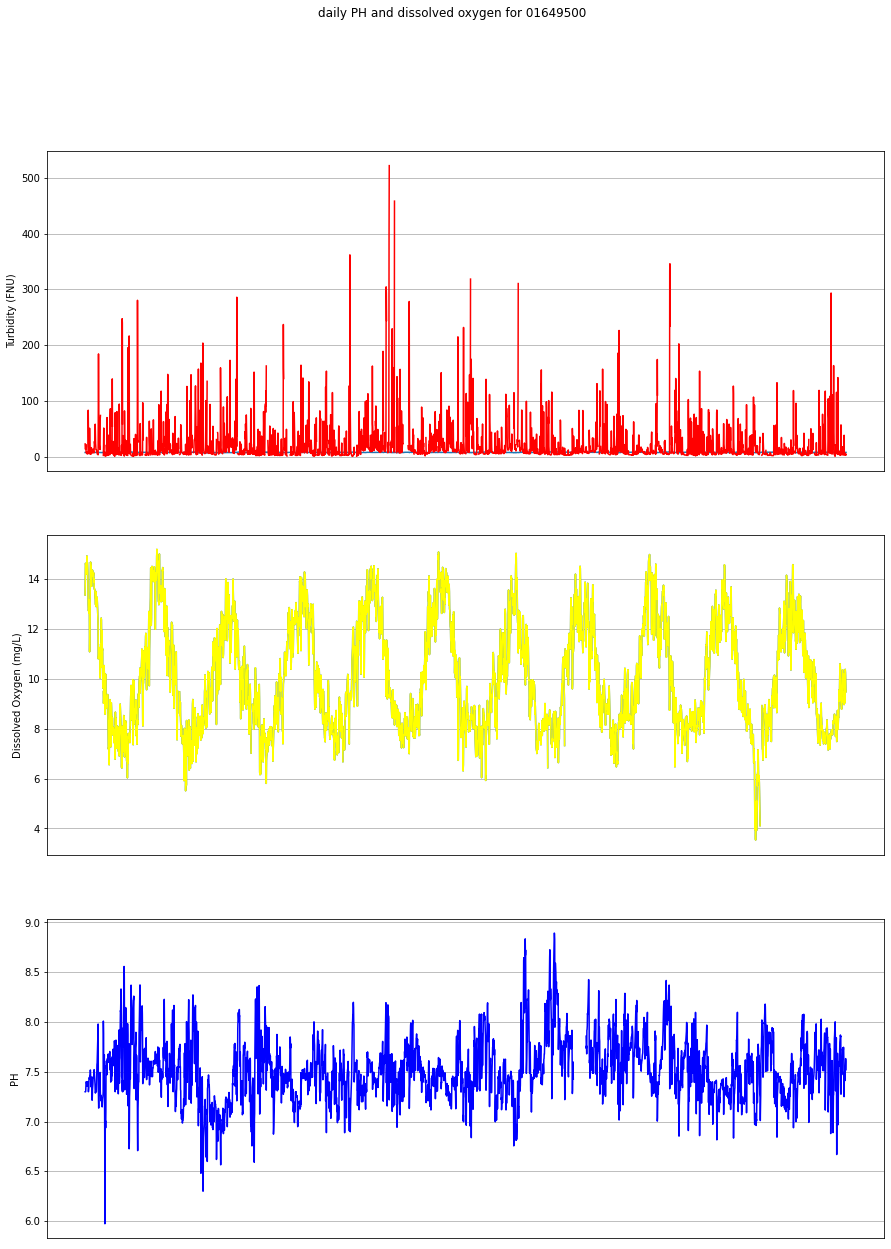

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(15, 20))
fig.suptitle('daily PH and dissolved oxygen for 01649500')
df_agg_01649500['PH'].plot(ax = ax1, x='DATE', y='PH')
df_agg_01649500['Dissolved_Oxy_DO'].plot(ax=ax2, x='DATE', y='Dissolved_Oxy_DO')

df_agg_01649500['Turbidity_FNU'].plot(ax = ax1, x='DATE', y='Turbidity_FNU', color = 'red')
ax1.set(ylabel ="Turbidity (FNU)")
df_agg_01649500['Dissolved_Oxy_DO'].plot(ax=ax2, x='DATE', y='Dissolved_Oxy_DO', color ='yellow')
ax2.set(ylabel ="Dissolved Oxygen (mg/L)")
df_agg_01649500['PH'].plot(ax=ax3, x='DATE', y='PH', color = 'blue')
ax3.set(ylabel ="PH")

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax2.xaxis.set_major_locator(years)
ax2.xaxis.set_major_formatter(years_fmt)
ax2.xaxis.set_minor_locator(months)

ax3.xaxis.set_major_locator(years)
ax3.xaxis.set_major_formatter(years_fmt)
ax3.xaxis.set_minor_locator(months)


#ax1.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax1.grid(which = 'major', axis ='both', b='True')
ax2.grid(which = 'major', axis ='both', b='True')
ax3.grid(which = 'major', axis ='both', b='True')


plt.show()

*This will complete the plots for the imported data from the water quality sampling. The next step will be to be able to plot the population in the county to see if any coorelation can be developed. *